<a href="https://colab.research.google.com/github/hfanahita/Nonlinear-Programming/blob/HW2/HW2/Gradient_Descent_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent with Backtracking Line Search for Minimizing ax^2 + by^2

In [ ]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator


In [ ]:
global a, b
def gradient(x):
    return np.array([2*a*x[0],2*b*x[1]])
def f(x):
    return a*(x[0]**2)+b*(x[1]**2)

In [ ]:
def backtracking(alpha, s, beta, x_k):
    i_k = 0
    t_k = s*(beta**i_k)
    while f(x_k) - f(x_k-t_k*gradient(x_k)) < alpha*t_k*(np.linalg.norm(gradient(x_k))**2):
        i_k = i_k+1
        t_k = s * (beta ** i_k)
    return t_k

In [ ]:
def gradient_method(epsilon, alpha, s, beta, x_0):
    number_of_iterations = 1
    t_k = backtracking(alpha, s, beta, x_0)
    x_k = x_0 - t_k*gradient(x_0)
    while np.linalg.norm(gradient(x_k)) > epsilon:
        number_of_iterations += 1
        t_k = backtracking(alpha, s, beta, x_k)
        x_k = x_k - t_k * gradient(x_k)
    return x_k,number_of_iterations

## Testing the algorithm with the function x^2+0.01y^2.

In [ ]:
a = 1
b = 0.01
# print(backtracking(0.25, 2, 0.5, np.array([2, 1])))
result = gradient_method(10**(-5), 0.25,2,0.5,np.array([0.01, 1.0]))
print("result: ", result)
x_k = result[0]
print("x_", result[1], ": ", x_k)
print("f(x_", result[1],"):", f(x_k))

result:  (array([0.        , 0.00049166]), 201)
x_ 201 :  [0.         0.00049166]
f(x_ 201 ): 2.4172696999799952e-09


## Impact of the parameters

### Changing Alpha
As the plots below clearly show, the number of iterations is very high near 0 and 1. Starting with low alpha values, there's a decrease in the number of iterations as alpha increases up to around 0.5. After that, for alpha between 0.5 and 0.75, the number of iterations stabilizes, and then there's an increase in the number of iterations as alpha approaches 1.

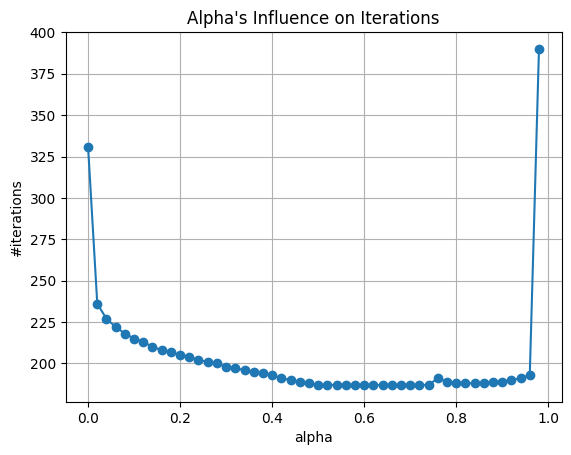

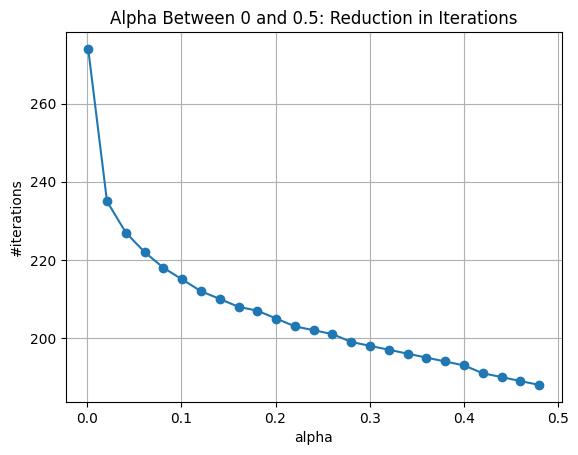

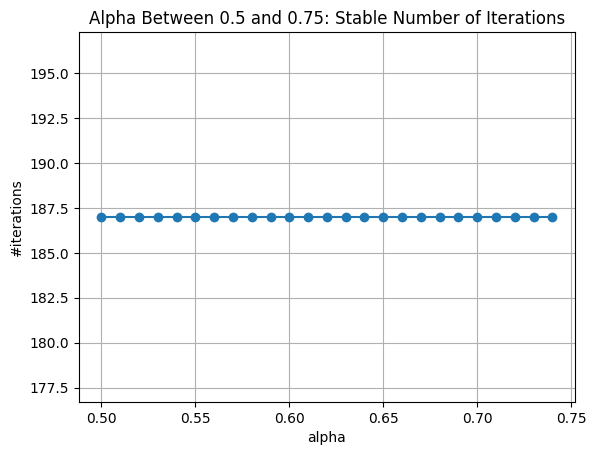

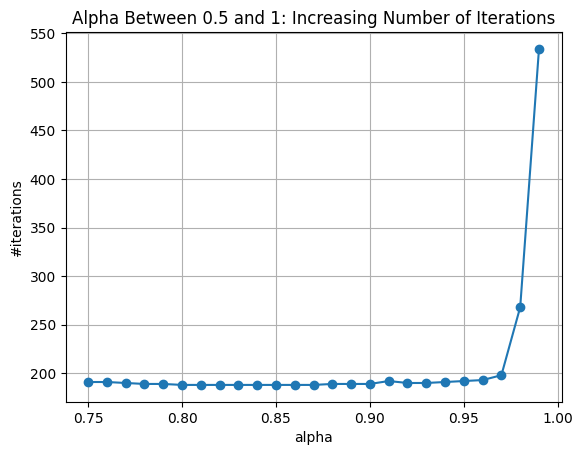

In [ ]:
n = 50
x = np.linspace(0.00001, 1, num=n, endpoint=False)
number_of_iterations = [0]*n
i = 0
for alpha in x:
  result = gradient_method(10**(-5), alpha,2,0.5,np.array([0.01, 1.0]))
  number_of_iterations[i] = result[1]
  i += 1

plt.plot(x, number_of_iterations, marker='o', linestyle='-')
plt.xlabel('alpha')
plt.ylabel('#iterations')
plt.title("Alpha's Influence on Iterations")
plt.grid(True)
plt.show()

n = 25
x = np.linspace(0.001, 0.5, num=n, endpoint=False)
number_of_iterations = [0]*n
i = 0
for alpha in x:
  result = gradient_method(10**(-5), alpha,2,0.5,np.array([0.01, 1.0]))
  number_of_iterations[i] = result[1]
  i += 1

plt.plot(x, number_of_iterations, marker='o', linestyle='-')
plt.xlabel('alpha')
plt.ylabel('#iterations')
plt.title('Alpha Between 0 and 0.5: Reduction in Iterations')
plt.grid(True)
plt.show()


n = 25
x = np.linspace(0.5, 0.75, num=n, endpoint=False)
number_of_iterations = [0]*n
i = 0
for alpha in x:
  result = gradient_method(10**(-5), alpha,2,0.5,np.array([0.01, 1.0]))
  number_of_iterations[i] = result[1]
  i += 1

plt.plot(x, number_of_iterations, marker='o', linestyle='-')
plt.xlabel('alpha')
plt.ylabel('#iterations')
plt.title('Alpha Between 0.5 and 0.75: Stable Number of Iterations')
plt.grid(True)
plt.show()

n = 25
x = np.linspace(0.75, 1, num=n, endpoint=False)
number_of_iterations = [0]*n
i = 0
for alpha in x:
  result = gradient_method(10**(-5), alpha,2,0.5,np.array([0.01, 1.0]))
  number_of_iterations[i] = result[1]
  i += 1

plt.plot(x, number_of_iterations, marker='o', linestyle='-')
plt.xlabel('alpha')
plt.ylabel('#iterations')
plt.title('Alpha Between 0.5 and 1: Increasing Number of Iterations')
plt.grid(True)
plt.show()


###Changing Beta
The following plots demonstrate a clear relationship between beta and the number of iterations. When beta is close to zero, the number of iterations skyrockets. However, as beta increases towards 0.25, we observe a significant decrease in this number.  Beyond that point, the number of iterations fluctuates, but exhibits a general upward trend.

It's worth noting that while the number of iterations increases as beta approaches 1, it appears to be bounded at around 500. This is a substantial difference to the behavior near beta equal to zero, where the number of iterations can exceed 40,000.

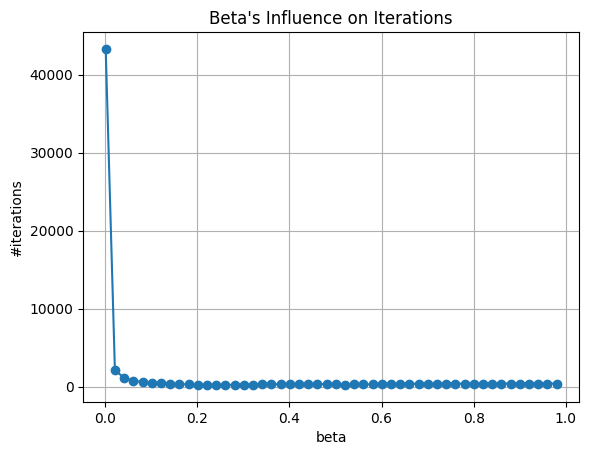

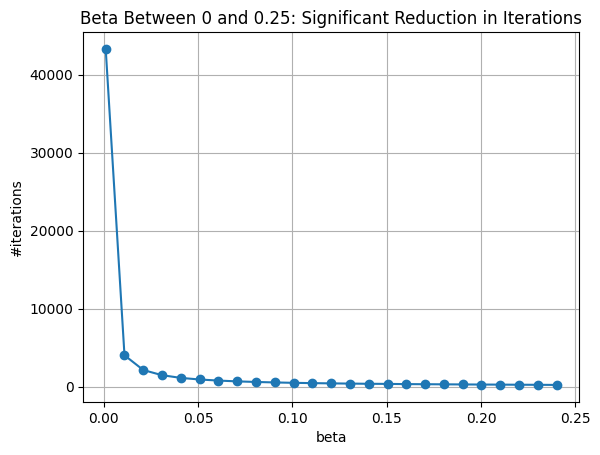

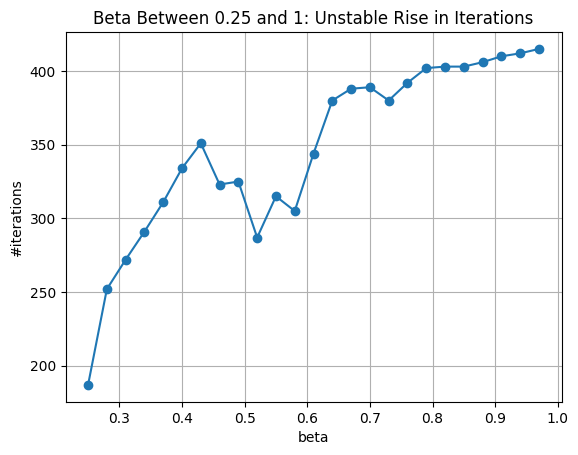

In [ ]:
n = 50
x = np.linspace(0.001, 1, num=n, endpoint=False)
number_of_iterations = [0]*n
i = 0
for beta in x:
  result = gradient_method(10**(-5),0.25,2,beta,np.array([0.01, 1.0]))
  number_of_iterations[i] = result[1]
  i += 1

plt.plot(x, number_of_iterations, marker='o', linestyle='-')
plt.xlabel('beta')
plt.ylabel('#iterations')
plt.title("Beta's Influence on Iterations")
plt.grid(True)
plt.show()


n = 25
x = np.linspace(0.001, 0.25, num=n, endpoint=False)
number_of_iterations = [0]*n
i = 0
for beta in x:
  result = gradient_method(10**(-5),0.25,2,beta,np.array([0.01, 1.0]))
  number_of_iterations[i] = result[1]
  i += 1

plt.plot(x, number_of_iterations, marker='o', linestyle='-')
plt.xlabel('beta')
plt.ylabel('#iterations')
plt.title('Beta Between 0 and 0.25: Significant Reduction in Iterations')
plt.grid(True)
plt.show()

n = 25
x = np.linspace(0.25,1, num=n, endpoint=False)
number_of_iterations = [0]*n
i = 0
for beta in x:
  result = gradient_method(10**(-5),0.25,2,beta,np.array([0.01, 1.0]))
  number_of_iterations[i] = result[1]
  i += 1

plt.plot(x, number_of_iterations, marker='o', linestyle='-')
plt.xlabel('beta')
plt.ylabel('#iterations')
plt.title('Beta Between 0.25 and 1: Unstable Rise in Iterations')
plt.grid(True)
plt.show()

###Changing S
By examining the plots across different intervals, we observe that as S goes to 0, the number of iterations increases sharply. However, as S increases beyond 1, this number decreases.  Furthermore, when S exceeds 1, the number of iterations fluctuates without any clear trend.  These observations suggest that S has a significant impact on the number of iterations, particularly at lower values. (or choose another concluding sentence)

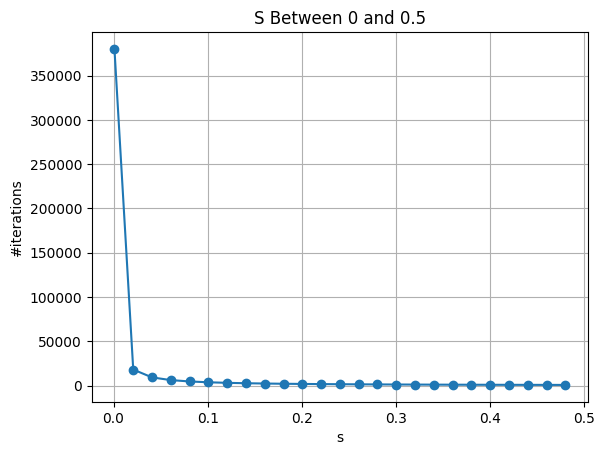

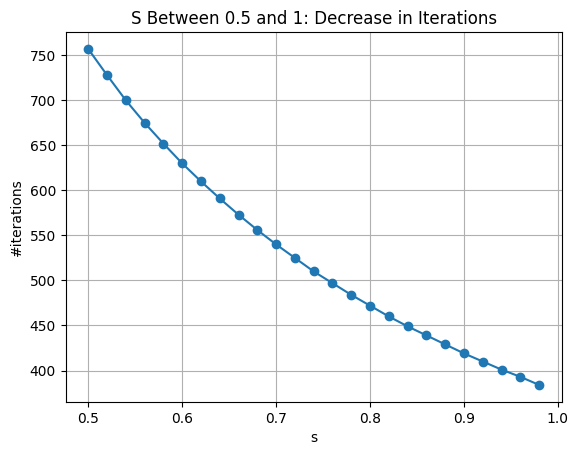

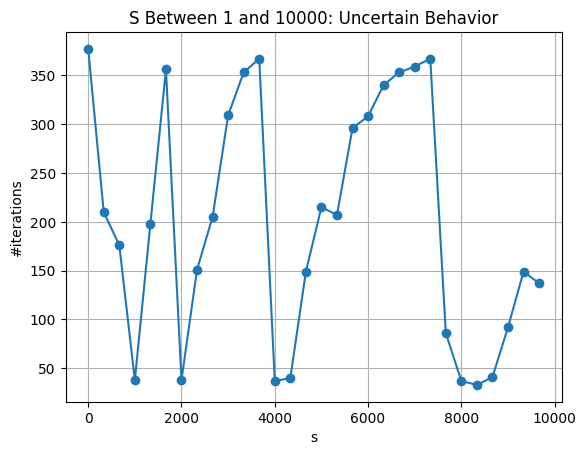

In [137]:
n = 25
x = np.linspace(0.001, 0.5, num=n, endpoint=False)
number_of_iterations = [0]*n
i = 0
for s in x:
  result = gradient_method(10**(-5),0.25,s,0.5,np.array([0.01, 1.0]))
  number_of_iterations[i] = result[1]
  i += 1

plt.plot(x, number_of_iterations, marker='o', linestyle='-')
plt.xlabel('s')
plt.ylabel('#iterations')
plt.title('S Between 0 and 0.5')
plt.grid(True)
plt.show()

n = 25
x = np.linspace(0.5, 1, num=n, endpoint=False)
number_of_iterations = [0]*n
i = 0
for s in x:
  result = gradient_method(10**(-5),0.25,s,0.5,np.array([0.01, 1.0]))
  number_of_iterations[i] = result[1]
  i += 1

plt.plot(x, number_of_iterations, marker='o', linestyle='-')
plt.xlabel('s')
plt.ylabel('#iterations')
plt.title('S Between 0.5 and 1: Decrease in Iterations')
plt.grid(True)
plt.show()


n = 30
x = np.linspace(1, 10000, num=n, endpoint=False)
number_of_iterations = [0]*n
i = 0
for s in x:
  result = gradient_method(10**(-5),0.25,s,0.5,np.array([0.01, 1.0]))
  number_of_iterations[i] = result[1]
  i += 1

plt.plot(x, number_of_iterations, marker='o', linestyle='-')
plt.xlabel('s')
plt.ylabel('#iterations')
plt.title('S Between 1 and 10000: Uncertain Behavior')
plt.grid(True)
plt.show()


##Changing the coefficient of y
As the following plot shows, the number of iterations spikes dramatically as the y-Coefficient approaches zero.  Interestingly, the number of iterations then decreases all the way to 1 as this coefficient approaches 1.


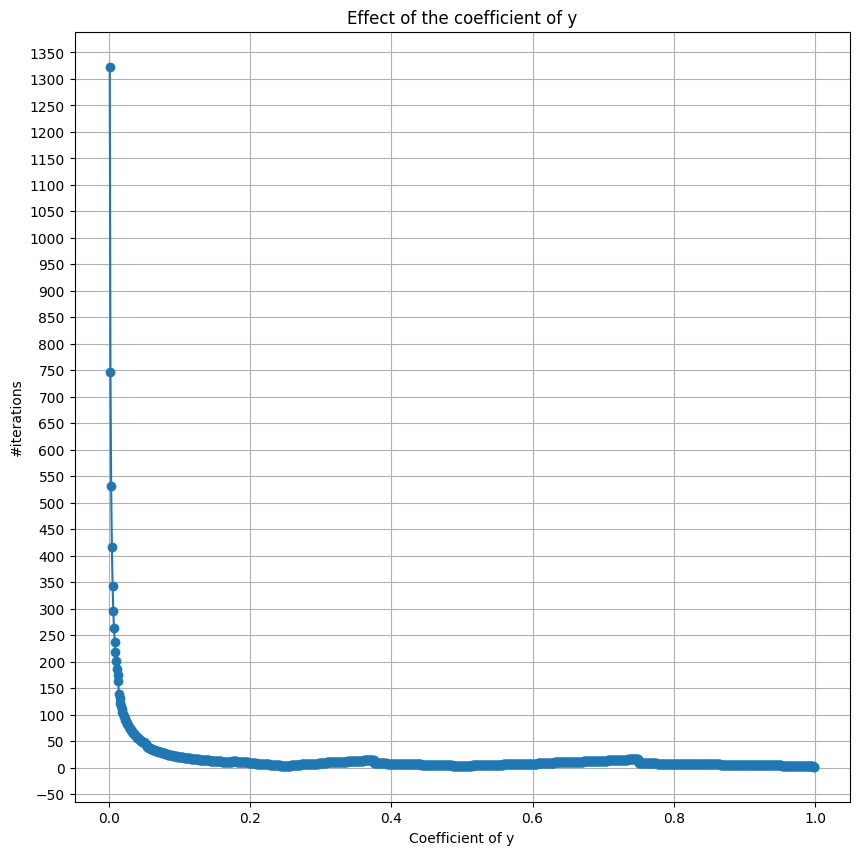

In [138]:
a = 1
n = 1000
x = np.linspace(0.001, 1, num=n, endpoint=False)
number_of_iterations = [0]*n
i = 0
for b in x:
  result = gradient_method(10**(-5),0.25,2,0.5,np.array([0.01, 1.0]))
  number_of_iterations[i] = result[1]
  i += 1

plt.figure(figsize=(10, 10))
plt.gca().yaxis.set_major_locator(MultipleLocator(50))
plt.plot(x, number_of_iterations, marker='o', linestyle='-')
plt.xlabel('Coefficient of y')
plt.ylabel('#iterations')
plt.title('Effect of the coefficient of y')
plt.grid(True)
plt.show()
